In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df=pd.read_csv("dataframe_final.csv",sep=",")

In [3]:
df.head()

,Any,Mes,Dia,Tram_Horari,Codi_Postal,Valor,temperature_2m,apparent_temperature,rain,wind_speed_10m,is_day,sunshine_duration,direct_radiation,Dia_Setmana,Festiu,Tasa interanual del IPI,dew_point_2m
0,2019,1,1,1,8001,71768.816539,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
1,2019,1,1,1,8002,105525.771005,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
2,2019,1,1,1,8003,109681.449902,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
3,2019,1,1,1,8004,114701.832375,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
4,2019,1,1,1,8005,117194.598557,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275


In [4]:
df_PCA=df[['temperature_2m', 'apparent_temperature','wind_speed_10m','sunshine_duration', 'direct_radiation','dew_point_2m','Valor']]

### Scree Plot (variància explicada acumulada)

Variància explicada per component:
Component 1: 0.5642
Component 2: 0.2753
Component 3: 0.1252
Component 4: 0.0202
Component 5: 0.0149
Component 6: 0.0002


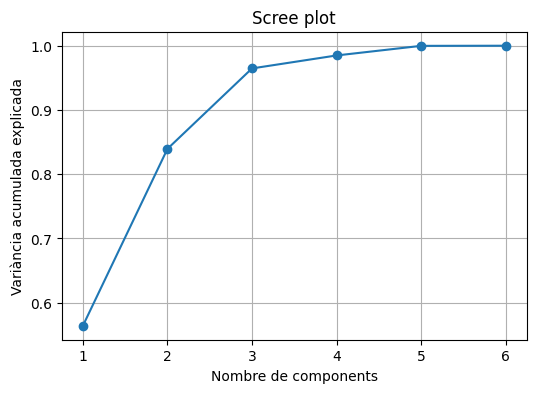

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecciona les variables a PCA (sense la variable resposta 'Valor' si només vols variables predictives)
X = df_PCA.drop(columns=['Valor'])

# Escala les dades (PCA funciona millor amb dades estandarditzades)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Mostra la variància explicada per cada component
explained_variance = pca.explained_variance_ratio_
print("Variància explicada per component:")
for i, var in enumerate(explained_variance, 1):
    print(f"Component {i}: {var:.4f}")

# Gràfic de la variància acumulada per decidir quantes components retenir
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància acumulada explicada')
plt.title('Scree plot')
plt.grid(True)
plt.show()


### Bi-plot (projecció de les observacions sobre els 2 primers components)

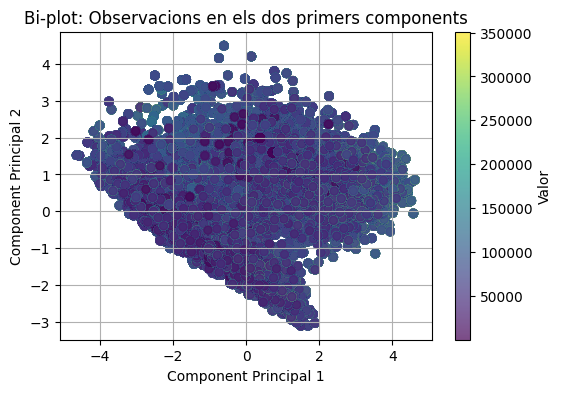

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_PCA['Valor'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Bi-plot: Observacions en els dos primers components')
plt.grid(True)
plt.show()

### Loading plot (importància de cada variable en els components)

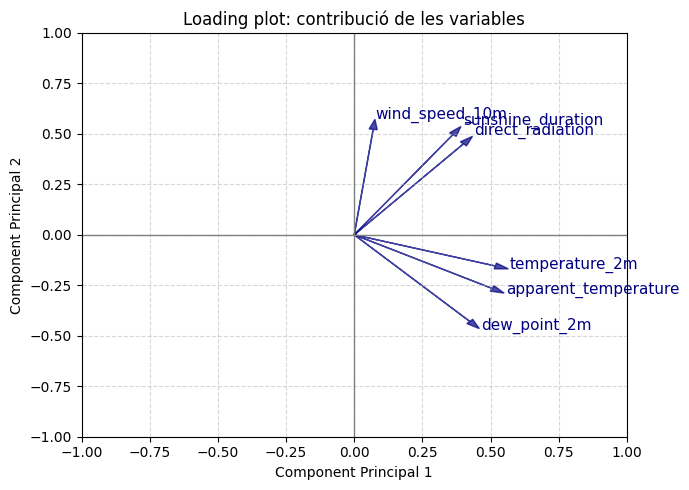

In [21]:
features = X.columns
loadings = pca.components_.T[:, :3]

plt.figure(figsize=(7, 5))

# Dibuixar fletxes (vectors)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='navy', alpha=0.7, head_width=0.03, head_length=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature,
             color='navy', fontsize=11)

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Loading plot: contribució de les variables')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

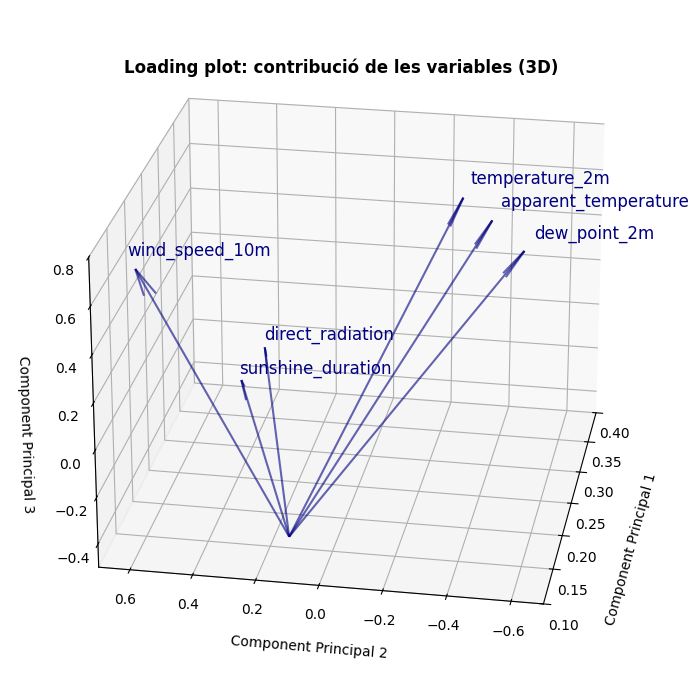

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features = X.columns
loadings = pca.components_.T[:, :3]

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')

for i, feature in enumerate(features):
    ax.quiver(0, 0, 0,
              loadings[i, 0], loadings[i, 1], loadings[i, 2],
              color='navy', alpha=0.6, arrow_length_ratio=0.1, linewidth=1.5)
    ax.text(loadings[i, 0]*1.05, loadings[i, 1]*1.05, loadings[i, 2]*1.05,
            feature, color='navy', fontsize=12)

ax.set_xlim([0.1, 0.4])
ax.set_ylim([-0.7, 0.7])
ax.set_zlim([-0.5, 0.8])

ax.set_xlabel('Component Principal 1', labelpad=15)
ax.set_ylabel('Component Principal 2', labelpad=10)
ax.set_zlabel('Component Principal 3', labelpad=10)

ax.view_init(elev=24, azim=190)

plt.tight_layout()
plt.subplots_adjust(right=1.2, top=0.99)  # Més espai a la dreta i títol més baix

# Afegir títol manualment a la figura, molt aprop de l'eix superior
fig.text(0.6, 0.9, 'Loading plot: contribució de les variables (3D)', 
         ha='center', fontsize=12, weight='bold')

plt.show()


In [20]:
import plotly.graph_objects as go
import numpy as np

features = X.columns
loadings = pca.components_.T[:, :3]

# Paràmetres visuals
arrow_scale = 1.5  # Escalem els vectors perquè es separin més
arrow_head_ratio = 0.08
label_offset = 1.25  # Distància del text respecte del vector

lines = []
arrow_heads = []
texts = []

for i, feature in enumerate(features):
    x, y, z = loadings[i, 0]*arrow_scale, loadings[i, 1]*arrow_scale, loadings[i, 2]*arrow_scale

    # Cos del vector
    lines.append(
        go.Scatter3d(
            x=[0, x],
            y=[0, y],
            z=[0, z],
            mode='lines',
            line=dict(color='blue', width=6),
            showlegend=False
        )
    )

    # Simulació de la punta de fletxa
    hx, hy, hz = x * (1 - arrow_head_ratio), y * (1 - arrow_head_ratio), z * (1 - arrow_head_ratio)
    arrow_heads.append(
        go.Scatter3d(
            x=[hx, x],
            y=[hy, y],
            z=[hz, z],
            mode='lines',
            line=dict(color='blue', width=2),
            showlegend=False
        )
    )

    # Etiquetes
    texts.append(
        go.Scatter3d(
            x=[x * label_offset],
            y=[y * label_offset],
            z=[z * label_offset],
            mode='text',
            text=[feature],
            textfont=dict(size=14, color='black'),
            showlegend=False
        )
    )

# Crear la figura
fig = go.Figure(data=lines + arrow_heads + texts)

# Configuració estètica
fig.update_layout(
    scene=dict(
        xaxis=dict(title='PC1', range=[-2, 2]),
        yaxis=dict(title='PC2', range=[-2, 2]),
        zaxis=dict(title='PC3', range=[-2, 2])
    ),
    title='Contribució de les Variables als Components Principals (amb Fletxes)',
    margin=dict(l=10, r=10, b=10, t=50),
    template='simple_white',
    width=500,
    height=500
)

fig.show()


In [8]:
features = X.columns
loadings = pca.components_.T[:, :3]

df_loadings = pd.DataFrame(loadings, index=features, columns=['Component Principal 1', 'Component Principal 2', 'Component Principal 3'])

print(df_loadings)


                      Component Principal 1  Component Principal 2  \
temperature_2m                     0.517592              -0.154501   
apparent_temperature               0.505885              -0.265708   
wind_speed_10m                     0.069494               0.522045   
sunshine_duration                  0.362058               0.496048   
direct_radiation                   0.400681               0.450312   
dew_point_2m                       0.423933              -0.429130   

                      Component Principal 3  
temperature_2m                     0.162738  
apparent_temperature               0.093005  
wind_speed_10m                     0.841987  
sunshine_duration                 -0.367087  
direct_radiation                  -0.309839  
dew_point_2m                       0.158653  
